In [0]:
from keras.datasets import reuters
import numpy as np
import keras.utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [0]:
len(train_data)

8982

In [0]:
def vectorize_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i in range(len(sequences)):
    for j in range(len(sequences[i])):
      results[i][sequences[i][j]] = 1
  return results

In [0]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [0]:
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [0]:
x_partial_train = x_train[1000:]
x_val = x_train[:1000]

y_partial_train = y_train[1000:]
y_val = y_train[:1000]

In [0]:
model = Sequential()
model.add(Dense(128, activation='relu',input_dim=10000))
model.add(Dense(128, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=['accuracy'])
history = model.fit(x_partial_train, y_partial_train, validation_data =(x_val, y_val),verbose =1, batch_size = 10, epochs = 4)

Train on 7982 samples, validate on 1000 samples
Epoch 1/4
7982/7982 [==============================] - 26s 3ms/step - loss: 0.0397 - acc: 0.9898 - val_loss: 0.0329 - val_acc: 0.9916
Epoch 2/4
7982/7982 [==============================] - 24s 3ms/step - loss: 0.0253 - acc: 0.9936 - val_loss: 0.0309 - val_acc: 0.9918
Epoch 3/4
7982/7982 [==============================] - 23s 3ms/step - loss: 0.0191 - acc: 0.9954 - val_loss: 0.0339 - val_acc: 0.9925
Epoch 4/4
7982/7982 [==============================] - 25s 3ms/step - loss: 0.0156 - acc: 0.9963 - val_loss: 0.0348 - val_acc: 0.9923


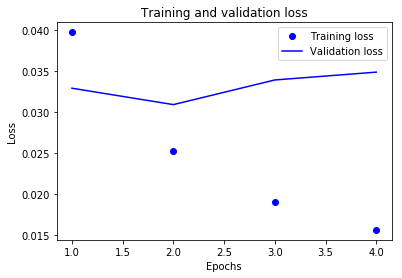

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

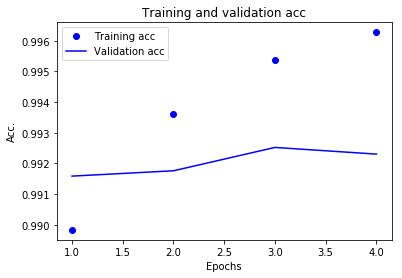

In [0]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc.')
plt.legend()
plt.show()

In [0]:
#Calcul de la véritable accuracy (car la binary_crossentropy calcule mal l'accuracy dans le cas multi-classes : chaque classe est prédite binairement.
# Toutes les 45 classes prédites comme "0" concourent artificiellement à augmenter l'accuracy (car d'un point de vue binaire elles ont été bien prédites) + la bonne classe prédite à "1" 

count_correct = 0
count_total = len(test_data)

for i in range(len(test_data)):
  if ( model.predict_classes(np.array(x_test[i]).reshape(1, 10000))[0] ==np.argmax(y_test[i], axis=0)):
    count_correct += 1

count_correct/count_total

0.794746215494212

In [0]:
model.evaluate(x_test,y_test)

2246/2246 [==============================] - 1s 259us/step


[0.038122054670447235, 0.9919760832803545]